In this project I explored publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Investor always want to invest in people who showed a profile of having a high probability of paying you back. I built a SVM model that will help predict this.

Following are the columns represent in loan dataset:

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
installment: The monthly installments owed by the borrower if the loan is funded.
log.annual.inc: The natural log of the self-reported annual income of the borrower.
dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
fico: The FICO credit score of the borrower.
days.with.cr.line: The number of days the borrower has had a credit line.
revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
#installing packages
install.packages("e1071")
library(e1071)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [2]:
#importing data
loan_data<- read.csv(file="loan_data.csv")

In [3]:
head(loan_data)  # head of loan data dataframe

credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,debt_consolidation,0.1189,829.10,11.35041,19.48,737,5639.958,28854,52.1,0,0,0,0
1,credit_card,0.1071,228.22,11.08214,14.29,707,2760.000,33623,76.7,0,0,0,0
1,debt_consolidation,0.1357,366.86,10.37349,11.63,682,4710.000,3511,25.6,1,0,0,0
1,debt_consolidation,0.1008,162.34,11.35041,8.10,712,2699.958,33667,73.2,1,0,0,0
1,credit_card,0.1426,102.92,11.29973,14.97,667,4066.000,4740,39.5,0,1,0,0
1,credit_card,0.0788,125.13,11.90497,16.98,727,6120.042,50807,51.0,0,0,0,0


In [4]:
str(loan_data)  #structure of the loan data

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : Factor w/ 7 levels "all_other","credit_card",..: 3 2 3 3 2 2 3 1 5 3 ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : int  0 0 1 1 0 0 0 0 1 1 ...
 $ delinq.2yrs      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ pub.rec          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ not.fully.paid   : int  0 0 0 0 0 0 1 1 0 0 ...


In [5]:
summary(loan_data)  # summary of the loan data

 credit.policy                 purpose        int.rate       installment    
 Min.   :0.000   all_other         :2331   Min.   :0.0600   Min.   : 15.67  
 1st Qu.:1.000   credit_card       :1262   1st Qu.:0.1039   1st Qu.:163.77  
 Median :1.000   debt_consolidation:3957   Median :0.1221   Median :268.95  
 Mean   :0.805   educational       : 343   Mean   :0.1226   Mean   :319.09  
 3rd Qu.:1.000   home_improvement  : 629   3rd Qu.:0.1407   3rd Qu.:432.76  
 Max.   :1.000   major_purchase    : 437   Max.   :0.2164   Max.   :940.14  
                 small_business    : 619                                    
 log.annual.inc        dti              fico       days.with.cr.line
 Min.   : 7.548   Min.   : 0.000   Min.   :612.0   Min.   :  179    
 1st Qu.:10.558   1st Qu.: 7.213   1st Qu.:682.0   1st Qu.: 2820    
 Median :10.929   Median :12.665   Median :707.0   Median : 4140    
 Mean   :10.932   Mean   :12.607   Mean   :710.8   Mean   : 4561    
 3rd Qu.:11.291   3rd Qu.:17.950   3rd 

In [6]:
#converting int column data type into factor
loan_data$inq.last.6mths<- as.factor(loan_data$inq.last.6mths)
loan_data$delinq.2yrs<- as.factor(loan_data$delinq.2yrs)
loan_data$pub.rec<- as.factor(loan_data$pub.rec)
loan_data$not.fully.paid<- as.factor(loan_data$not.fully.paid)
loan_data$credit.policy<- as.factor(loan_data$credit.policy)

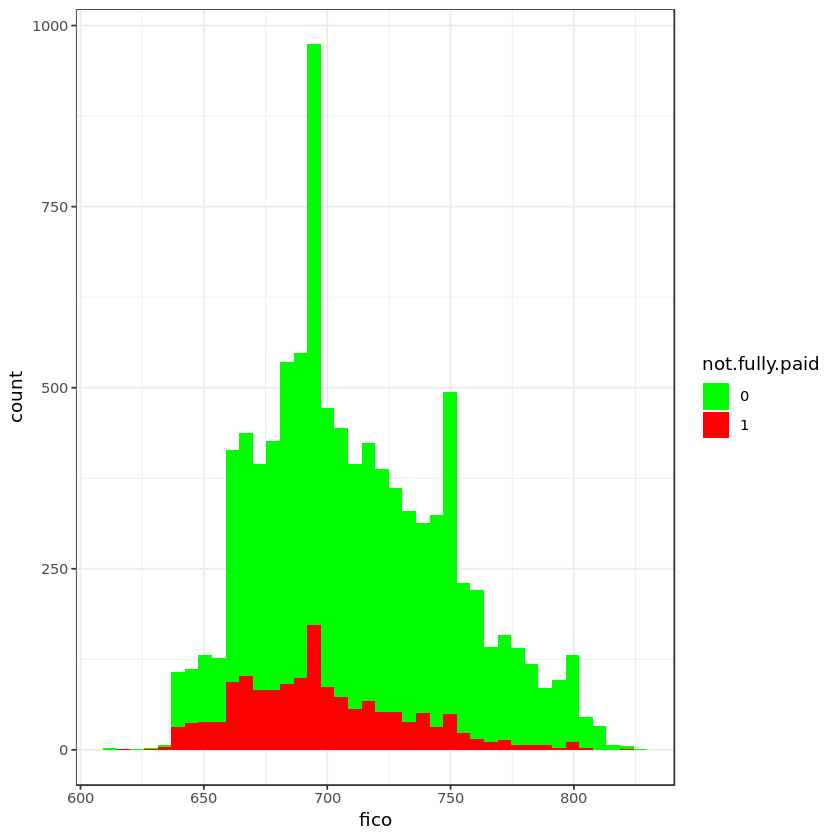

In [7]:
# Data visualization
# histogram of fico scores colored by not.fully.paid
library(ggplot2)
print(ggplot(loan_data, aes(fico))+geom_histogram(aes(fill=not.fully.paid),bins=40)
      + scale_fill_manual(values = c('green','red')) + theme_bw())

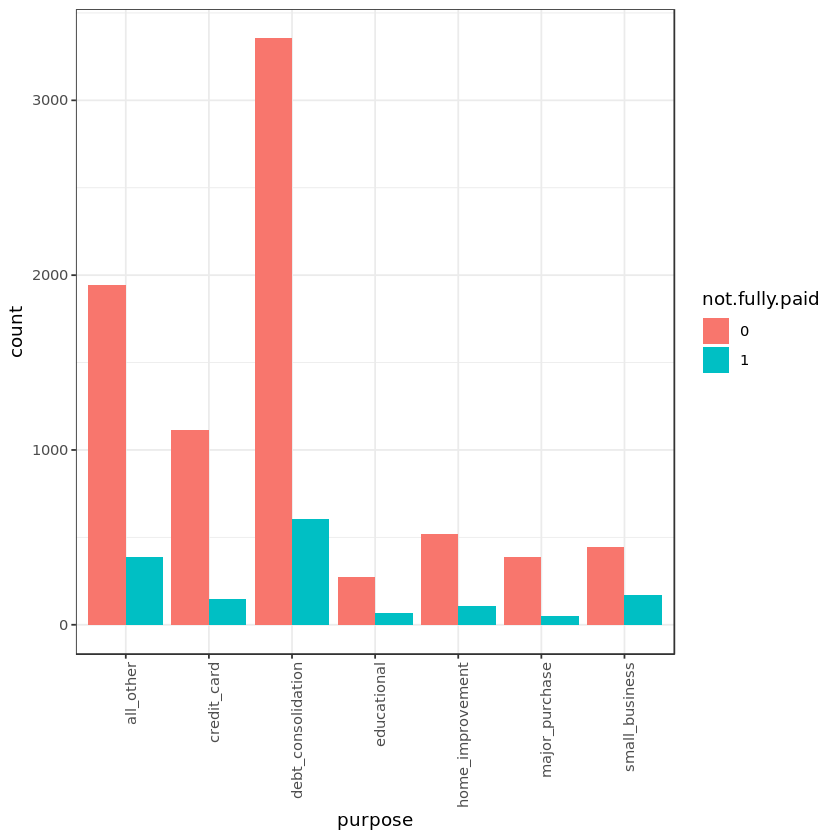

In [8]:
#barplot of purpose counts, colored by not.fully.paid
print(ggplot(loan_data, aes( purpose))+geom_bar(aes(fill=not.fully.paid),position="dodge")+ theme_bw()
      + theme(axis.text.x = element_text(angle = 90, hjust = 1)))

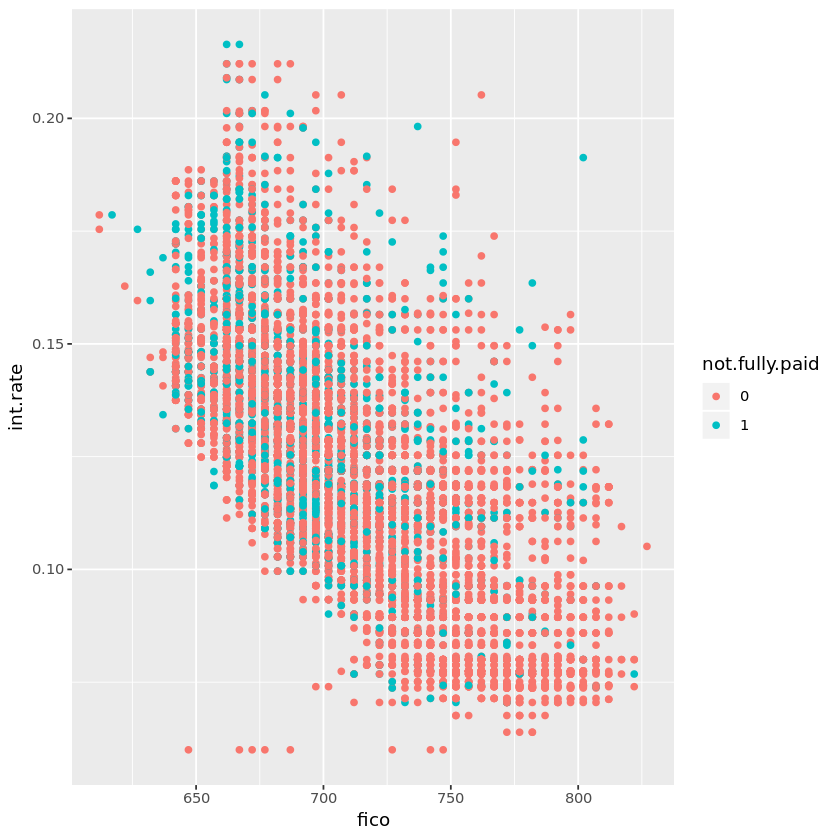

In [9]:
#scatterplot of fico score versus int.rate
print(ggplot(loan_data, aes(x=fico, y=int.rate))+geom_point(aes(color=not.fully.paid)))

In [10]:
# splitting data into train and test
set.seed(2)
library(caTools)
split<- sample.split(loan_data$not.fully.paid, SplitRatio = 0.7)
loan.test<- subset(loan_data, split==FALSE)
loan.train<- subset(loan_data, split==TRUE)

In [11]:
#building svm model
svm_model<- svm(not.fully.paid ~., data=loan.train)
summary(svm_model) #summary of the model


Call:
svm(formula = not.fully.paid ~ ., data = loan.train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.01724138 

Number of Support Vectors:  2839

 ( 1766 1073 )


Number of Classes:  2 

Levels: 
 0 1




In [19]:
#predict new values from the test set using your model
pred_values <- predict(svm_model,loan.test[1:13])
head(pred_values)

5  6 10 15 18 19 
 0  0  0  0  0  0 
Levels: 0 1

In [20]:
#confusion matrix
table(pred_values,loan.test$not.fully.paid)

           
pred_values    0    1
          0 2413  460
          1    0    0

In [22]:
#tuning the model
tune.results <- tune(svm,train.x=not.fully.paid~., data=loan.train,kernel='radial',
                     ranges=list(cost=c(1,10), gamma=c(0.5,1)))
summary(tune.results)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.1595796 

- Detailed performance results:
  cost gamma     error dispersion
1    1   0.5 0.1595796 0.01267396
2   10   0.5 0.2032805 0.01346095
3    1   1.0 0.1610715 0.01271944
4   10   1.0 0.1786701 0.01077337


In [23]:
# building new model using best parameters(cost and gamma)
newmodel <- svm(not.fully.paid ~ .,data=loan.train,cost=1,gamma = 0.5)
summary(newmodel)


Call:
svm(formula = not.fully.paid ~ ., data = loan.train, cost = 1, gamma = 0.5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  4603

 ( 3530 1073 )


Number of Classes:  2 

Levels: 
 0 1




In [24]:
#predicted values using test data and model
predicted.values <- predict(newmodel,loan.test[1:13])
head(predicted.values)

5  6 10 15 18 19 
 0  0  0  0  0  0 
Levels: 0 1

In [25]:
#confusion matrix
table(predicted.values,loan.test$not.fully.paid)

                
predicted.values    0    1
               0 2411  458
               1    2    2